In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize, differential_evolution
import random

# Ensures consistent results every time the code is run
np.random.seed(42)
random.seed(42)

# 1. Load the data
data = pd.read_csv('xy_data.csv')
x_data = data['x'].values
y_data = data['y'].values

# Define the 't' range for which the data is given (and for curve generation)
t_range = np.linspace(6, 60, len(x_data)) # Assuming 't' values correspond to data points in order

# Define the parametric equations
def parametric_x(t, theta, M, X):
    return (t * np.cos(np.deg2rad(theta)) -
            np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(np.deg2rad(theta)) + X)

def parametric_y(t, theta, M):
    return (42 + t * np.sin(np.deg2rad(theta)) +
            np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(np.deg2rad(theta)))

# Define the error function (L1 distance)
def error_function(params):
    theta, M, X = params

    # Generate predicted curve points for the same 't' values as the data
    x_predicted = parametric_x(t_range, theta, M, X)
    y_predicted = parametric_y(t_range, theta, M)

    # Calculate L1 distance
    l1_distance = np.sum(np.abs(x_predicted - x_data)) + np.sum(np.abs(y_predicted - y_data))
    return l1_distance

# Define bounds for the unknown variables
bounds = [(0, 50),       # theta (in degrees)
          (-0.05, 0.05), # M
          (0, 100)]      # X

# Initial guess for the optimization (can be refined or run multiple times)
# A simple approach for an initial guess is to pick values in the middle of the bounds.
initial_guess = [(bounds[0][0] + bounds[0][1]) / 2,
                 (bounds[1][0] + bounds[1][1]) / 2,
                 (bounds[2][0] + bounds[2][1]) / 2]

# Perform optimization
# Using differential_evolution for global optimization due to its robustness
result = differential_evolution(error_function, bounds, seed=42)

# Extract optimized parameters
optimal_theta, optimal_M, optimal_X = result.x
min_error = result.fun

print(f"Optimal Theta: {optimal_theta:.4f} degrees")
print(f"Optimal M: {optimal_M:.4f}")
print(f"Optimal X: {optimal_X:.4f}")
print(f"Minimum L1 Error: {min_error:.4f}")


# Save fitted results to file
with open("fit_results.txt", "w") as f:
    f.write(f"Optimal Theta: {optimal_theta:.4f} degrees\n")
    f.write(f"Optimal M: {optimal_M:.6f}\n")
    f.write(f"Optimal X: {optimal_X:.4f}\n")
    f.write(f"Minimum L1 Error: {min_error:.4f}\n")

Optimal Theta: 27.9990 degrees
Optimal M: 0.0211
Optimal X: 54.2703
Minimum L1 Error: 37873.4825


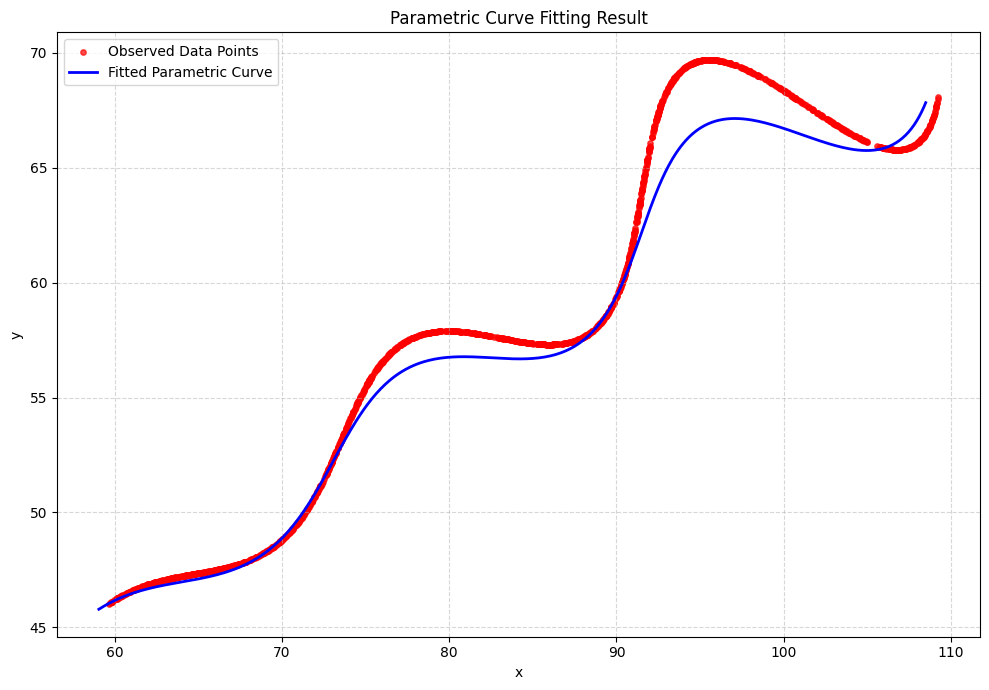

In [2]:
import matplotlib.pyplot as plt

# Generate smooth t values for the fitted curve
t_for_plot = np.linspace(6, 60, 500)

# Compute fitted curve
fitted_x = parametric_x(t_for_plot, optimal_theta, optimal_M, optimal_X)
fitted_y = parametric_y(t_for_plot, optimal_theta, optimal_M)

# Plot
plt.figure(figsize=(10, 7))
plt.scatter(x_data, y_data, label='Observed Data Points', s=15, color='red', alpha=0.7)
plt.plot(fitted_x, fitted_y, label='Fitted Parametric Curve', color='blue', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Parametric Curve Fitting Result')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the plot automatically
plt.savefig("parametric_fit_result.png", dpi=300)

plt.show()
